<a href="https://colab.research.google.com/github/mihir0804/AI_Driven_Flight_Delay_Forecasting_Classification_Pipelines/blob/main/AirPredictAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

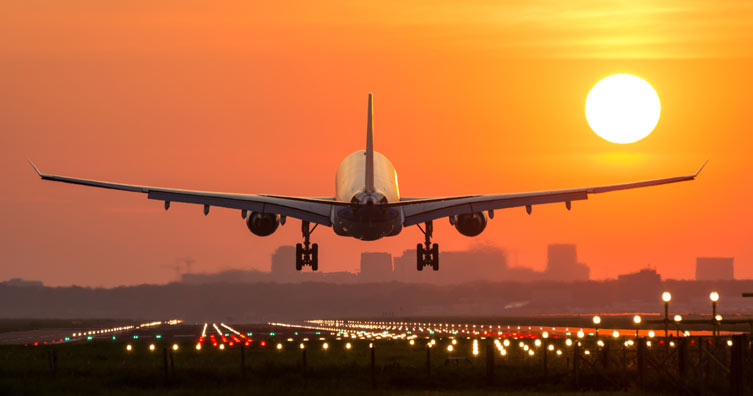

This project has a record of flight details from Washington,DC area into New York city during the year of 2004 in the month of January. The main aim of the project is to predict if a new flight will be delayed or not from the provided data using 'MACHINE LEARNING'

PART 1 of this would be an Exploratory Data Analysis where various features(columns) in the provided dataset will be analyzed using various methods to interpret their relation and visualize them

PART 2 will be Model Training based on Naive Bayes theorem and train them to pedict whether the flight arrives at ontime or it gets delayed.

#### **Highlights of the data**

#### **The data consists of 10 features (columns) namely**

- Carrier
- Departure_Time
- Destination
- Date
- Flight_Number
- Origin
- Day_of_the_Week
- Day_of_the_Month   





#### **Day of the Week**
**Each number represents the corresponding day**
- 1- Monday
- 2- Tuesday
- 3- Wednesday
- 4- Thursday
- 5- Friday
- 6- Saturday
- 7- Sunday

#### Day of the Month
Each number represents the days in a month.

#### Abbreviations
#### Carrier

- CO - Continental
- DH - Atlantic Coast
- DL - Delta
- MQ - American Eagle
- OH - Comair
- RU - Continental Express
- UA - United
- US - USAirways


#### Destination

- JFK - Kennedy
- LGA - LaGuardia
- EWR - Newark


#### Origin

- DCA - Reagan National
- IAD - Dulles
- BWI - Baltimore–Washington Int’l


# **EXPLORATORY DATA ANALYSIS**

In [1]:
# Importing Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans


# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA


In [2]:
# Importing Data using Pandas Function
df = pd.read_csv('/content/Flight-Data.csv')
# if file csv uplond in
# It will print Shuffle 100% Dataset
df.sample(frac = 1)


,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
1321,RU,1028,EWR,169,1/19/2004,2303,BWI,1,19,ontime
183,DL,1629,LGA,214,01-04-04,1760,DCA,7,4,ontime
1584,DH,831,EWR,213,1/22/2004,7299,IAD,4,22,ontime
128,DL,1428,LGA,214,01-03-04,1756,DCA,6,3,ontime
1309,US,1059,LGA,214,1/19/2004,2168,DCA,1,19,ontime
...,...,...,...,...,...,...,...,...,...,...
1466,MQ,1050,LGA,214,1/21/2004,4960,DCA,3,21,ontime
444,US,1859,LGA,214,01-07-04,2184,DCA,3,7,ontime
1521,DH,642,LGA,229,1/22/2004,7790,IAD,4,22,ontime
1632,MQ,655,LGA,214,1/23/2004,4952,DCA,5,23,ontime


## **Displaying datatype information of the dataset**

In [3]:
# Checking Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Carrier           2199 non-null   object
 1   Departure Time    2199 non-null   int64 
 2   Destination       2199 non-null   object
 3   Distance          2199 non-null   int64 
 4   Date              2199 non-null   object
 5   Flight Number     2199 non-null   int64 
 6   Origin            2199 non-null   object
 7   Day of the Week   2199 non-null   int64 
 8   Day of the Month  2199 non-null   int64 
 9   Delayed           2199 non-null   object
dtypes: int64(5), object(5)
memory usage: 171.9+ KB


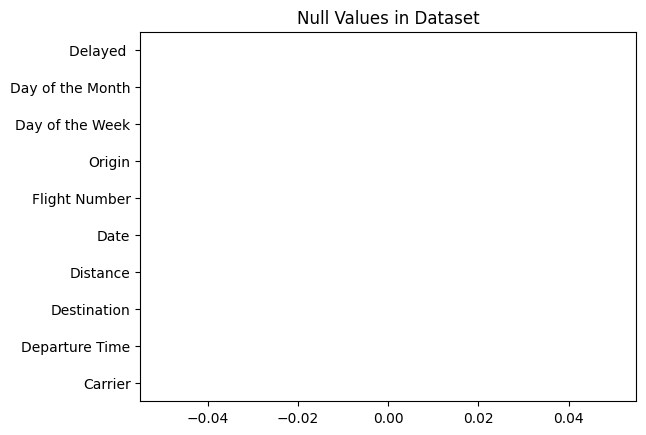

In [4]:
# Checking Null Value
df.isnull().sum().plot(kind = 'barh')
plt.title('Null Values in Dataset')
plt.show()

## **The Entire details in the dataset is imported and displayed as 2199 rows and 10 columns**

In [5]:
#showing the first 5 rows
df.head()

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
0,OH,1455,JFK,184,01-01-04,5935,BWI,4,1,ontime
1,DH,1640,JFK,213,01-01-04,6155,DCA,4,1,ontime
2,DH,1245,LGA,229,01-01-04,7208,IAD,4,1,ontime
3,DH,1709,LGA,229,01-01-04,7215,IAD,4,1,ontime
4,DH,1035,LGA,229,01-01-04,7792,IAD,4,1,ontime


In [6]:
#showing the Last 5 rows
df.tail()

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
2194,RU,644,EWR,199,1/31/2004,2761,DCA,6,31,ontime
2195,RU,1653,EWR,213,1/31/2004,2497,IAD,6,31,ontime
2196,RU,1558,EWR,199,1/31/2004,2361,DCA,6,31,ontime
2197,RU,1403,EWR,199,1/31/2004,2216,DCA,6,31,ontime
2198,RU,1736,EWR,199,1/31/2004,2097,DCA,6,31,ontime


In [7]:
#obtaining the shape of the dataset
df.shape

(2199, 10)

In [8]:
# Dataset Spliy Data
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(exclude = 'object')
categorical_col

,Carrier,Destination,Date,Origin,Delayed
0,OH,JFK,01-01-04,BWI,ontime
1,DH,JFK,01-01-04,DCA,ontime
2,DH,LGA,01-01-04,IAD,ontime
3,DH,LGA,01-01-04,IAD,ontime
4,DH,LGA,01-01-04,IAD,ontime
...,...,...,...,...,...
2194,RU,EWR,1/31/2004,DCA,ontime
2195,RU,EWR,1/31/2004,IAD,ontime
2196,RU,EWR,1/31/2004,DCA,ontime
2197,RU,EWR,1/31/2004,DCA,ontime


In [9]:
numerical_col

,Departure Time,Distance,Flight Number,Day of the Week,Day of the Month
0,1455,184,5935,4,1
1,1640,213,6155,4,1
2,1245,229,7208,4,1
3,1709,229,7215,4,1
4,1035,229,7792,4,1
...,...,...,...,...,...
2194,644,199,2761,6,31
2195,1653,213,2497,6,31
2196,1558,199,2361,6,31
2197,1403,199,2216,6,31


In [10]:
df

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
0,OH,1455,JFK,184,01-01-04,5935,BWI,4,1,ontime
1,DH,1640,JFK,213,01-01-04,6155,DCA,4,1,ontime
2,DH,1245,LGA,229,01-01-04,7208,IAD,4,1,ontime
3,DH,1709,LGA,229,01-01-04,7215,IAD,4,1,ontime
4,DH,1035,LGA,229,01-01-04,7792,IAD,4,1,ontime
...,...,...,...,...,...,...,...,...,...,...
2194,RU,644,EWR,199,1/31/2004,2761,DCA,6,31,ontime
2195,RU,1653,EWR,213,1/31/2004,2497,IAD,6,31,ontime
2196,RU,1558,EWR,199,1/31/2004,2361,DCA,6,31,ontime
2197,RU,1403,EWR,199,1/31/2004,2216,DCA,6,31,ontime


## **EDA : Explotatory Data Analysis [Univariat Analysis]**

In [11]:
def univariate_stats():
    import pandas as pd
    from collections import OrderedDict

    stats = []

    # Select numeric columns only
    numeric_cols = df.select_dtypes(include=['number']).columns

    for i in numeric_cols:
        s = df[i].dropna()  # drop NaNs to avoid issues
        numerical_stats = OrderedDict({
            'Feature': i,
            'Count': s.count(),
            'Minimum': s.min(),
            'Maximum': s.max(),
            'Mean': s.mean(),
            'Median': s.median(),
            'Q1': s.quantile(0.25),
            'Q3': s.quantile(0.75),
            'IQR': s.quantile(0.75) - s.quantile(0.25),
            'Standard Deviation': s.std(),
            'Skewness': s.skew(),
            'Kurtosis': s.kurtosis()
        })
        stats.append(numerical_stats)

    report = pd.DataFrame(stats)
    return report

# Usage
ans = univariate_stats()
ans


,Feature,Count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Departure Time,2199,548,2330,1370.490223,1450.0,1011.0,1709.0,698.0,440.893123,-0.137947,-1.007377
1,Distance,2199,169,229,211.855844,214.0,213.0,214.0,1.0,13.312840,-1.629049,3.427889
2,Flight Number,2199,746,7924,3811.567531,2385.0,2156.0,5935.0,3779.0,2408.017328,0.603682,-1.226756
3,Day of the Week,2199,1,7,3.906321,4.0,2.0,5.0,3.0,1.902862,0.026073,-1.100392
4,Day of the Month,2199,1,31,16.020464,16.0,8.0,23.0,15.0,8.679829,0.035490,-1.167826


In [12]:
df.columns

Index(['Carrier', 'Departure Time', 'Destination', 'Distance', 'Date',
       'Flight Number', 'Origin', 'Day of the Week', 'Day of the Month',
       'Delayed '],
      dtype='object')

## **As the column name in the dataset contains space in between two words, replacement of space with an underscore is done as the interpreter shows error in presence of space between words**

In [13]:
#renaming the column
df=df.rename(columns={'Delayed_':'Delayed'})
df

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
0,OH,1455,JFK,184,01-01-04,5935,BWI,4,1,ontime
1,DH,1640,JFK,213,01-01-04,6155,DCA,4,1,ontime
2,DH,1245,LGA,229,01-01-04,7208,IAD,4,1,ontime
3,DH,1709,LGA,229,01-01-04,7215,IAD,4,1,ontime
4,DH,1035,LGA,229,01-01-04,7792,IAD,4,1,ontime
...,...,...,...,...,...,...,...,...,...,...
2194,RU,644,EWR,199,1/31/2004,2761,DCA,6,31,ontime
2195,RU,1653,EWR,213,1/31/2004,2497,IAD,6,31,ontime
2196,RU,1558,EWR,199,1/31/2004,2361,DCA,6,31,ontime
2197,RU,1403,EWR,199,1/31/2004,2216,DCA,6,31,ontime


### **Statistical information of the dataset**

In [14]:
#statistical description of data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Departure Time,2199.0,1370.490223,440.893123,548.0,1011.0,1450.0,1709.0,2330.0
Distance,2199.0,211.855844,13.312840,169.0,213.0,214.0,214.0,229.0
Flight Number,2199.0,3811.567531,2408.017328,746.0,2156.0,2385.0,5935.0,7924.0
Day of the Week,2199.0,3.906321,1.902862,1.0,2.0,4.0,5.0,7.0
Day of the Month,2199.0,16.020464,8.679829,1.0,8.0,16.0,23.0,31.0


In [15]:
#to find the presence of null value
df.isnull().sum()

,0
Carrier,0
Departure Time,0
Destination,0
Distance,0
Date,0
Flight Number,0
Origin,0
Day of the Week,0
Day of the Month,0
Delayed,0


### **As the data doesn't contains any null and duplicate values,tideous process aren't involved while handling the data**

# **DATA PRE-PROCESSING**

As the Departure Time has both hours and minutes combined together, only hours is retained and minutes are removed off

- the first digits are taken as hours and last two digits as minutes

In [16]:
#slicing only the hours from departure time
df['Departure Time']=df['Departure Time'].astype(str).str.zfill(4).str[:2].astype(int)
df

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
0,OH,14,JFK,184,01-01-04,5935,BWI,4,1,ontime
1,DH,16,JFK,213,01-01-04,6155,DCA,4,1,ontime
2,DH,12,LGA,229,01-01-04,7208,IAD,4,1,ontime
3,DH,17,LGA,229,01-01-04,7215,IAD,4,1,ontime
4,DH,10,LGA,229,01-01-04,7792,IAD,4,1,ontime
...,...,...,...,...,...,...,...,...,...,...
2194,RU,6,EWR,199,1/31/2004,2761,DCA,6,31,ontime
2195,RU,16,EWR,213,1/31/2004,2497,IAD,6,31,ontime
2196,RU,15,EWR,199,1/31/2004,2361,DCA,6,31,ontime
2197,RU,14,EWR,199,1/31/2004,2216,DCA,6,31,ontime


## **CORRELATION**


## **Correlation is an important statistical feature which shows the relationship between the variables in various visualization forms such as heatmaps.In this project,Pearson method of correlation is used to find the statistical relationship between the variables**

In [17]:
#displaying the correlation between the columns of the flght dataset
correlation = df.select_dtypes(include=['number']).corr()
correlation

,Departure Time,Distance,Flight Number,Day of the Week,Day of the Month
Departure Time,1.000000,0.063778,0.118204,0.051351,0.002313
Distance,0.063778,1.000000,0.420868,-0.020397,0.009459
Flight Number,0.118204,0.420868,1.000000,0.019334,-0.010119
Day of the Week,0.051351,-0.020397,0.019334,1.000000,0.015955
Day of the Month,0.002313,0.009459,-0.010119,0.015955,1.000000


# **Correlation between the variables**

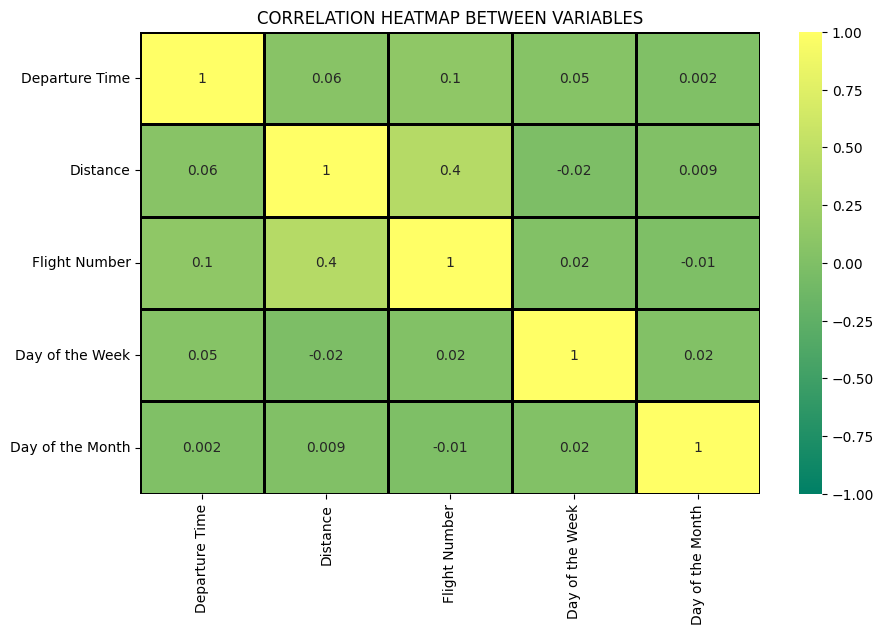

In [18]:
# Select numeric columns and create Pearson correlation
corr_df = df.select_dtypes(include=['number']).corr(method="pearson")

# Plot heatmap
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="summer", linewidths=1, linecolor="Black")
heatmap.set_title("CORRELATION HEATMAP BETWEEN VARIABLES")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()


## **DATA VISUALIZATION**

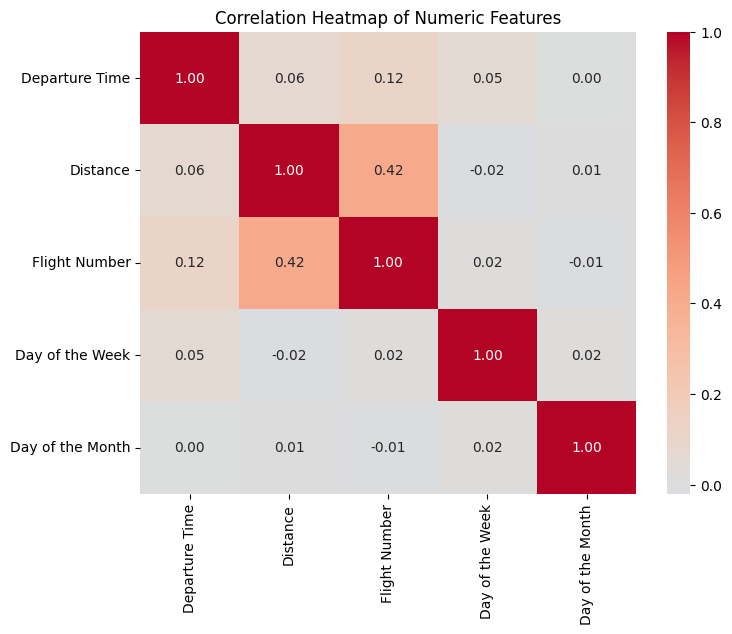

In [19]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


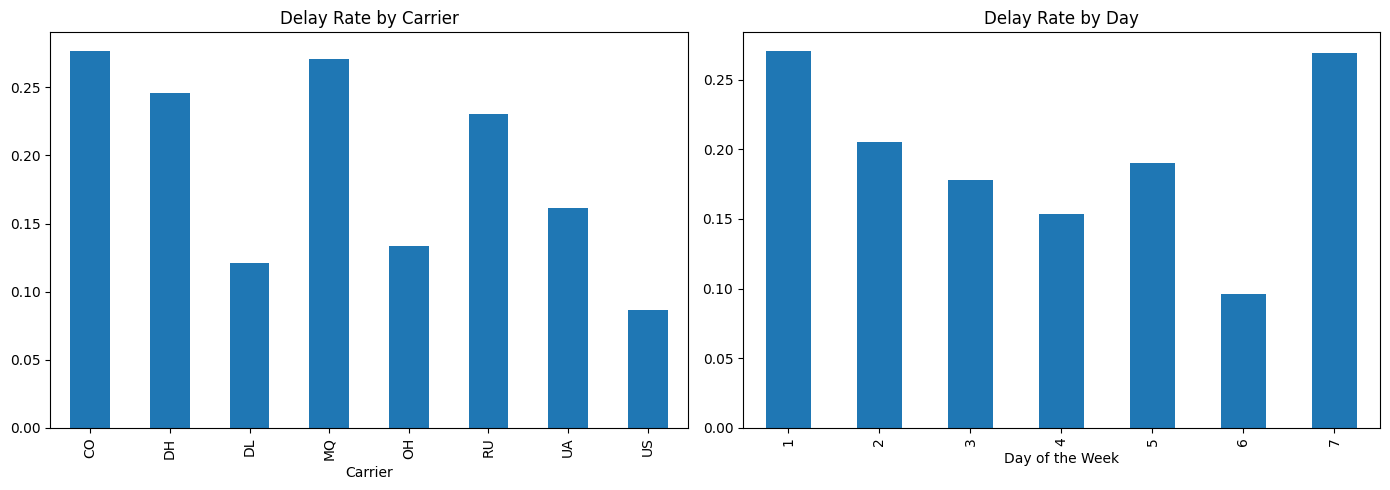

In [20]:
df.columns = df.columns.str.strip()
df['Delayed_numeric'] = df['Delayed'].map({'ontime':0, 'delayed':1})

fig, axes = plt.subplots(1,2, figsize=(14,5))

df.groupby('Carrier')['Delayed_numeric'].mean().plot(kind='bar', ax=axes[0], title='Delay Rate by Carrier')
df.groupby('Day of the Week')['Delayed_numeric'].mean().plot(kind='bar', ax=axes[1], title='Delay Rate by Day')

plt.tight_layout()
plt.show()


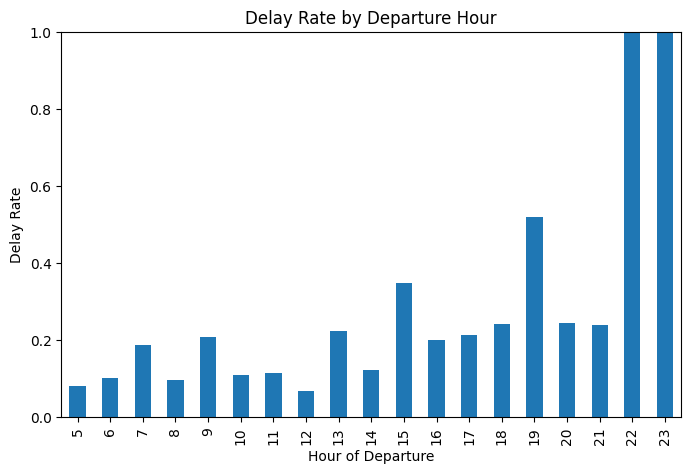

In [21]:
# Extract hour if not already done
df['Departure_Hour'] = df['Departure Time'].astype(int)

df.groupby('Departure_Hour')['Delayed_numeric'].mean().plot(kind='bar', figsize=(8,5))
plt.title("Delay Rate by Departure Hour")
plt.ylabel("Delay Rate")
plt.xlabel("Hour of Departure")
plt.ylim(0,1)
plt.show()


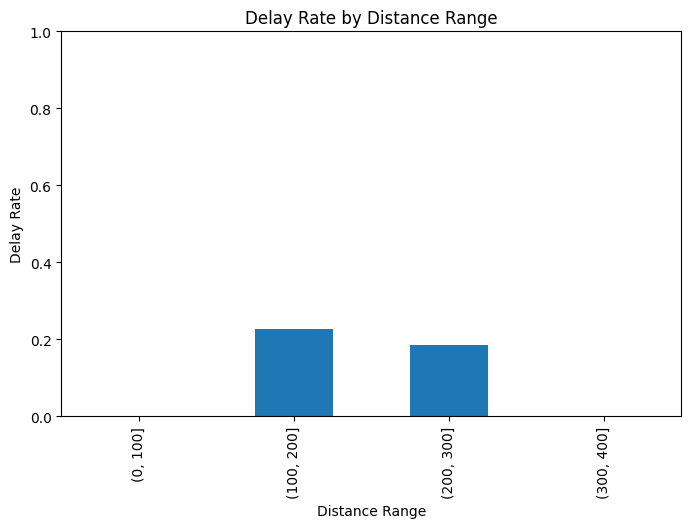

In [22]:
# Create distance bins
df['Distance_Bin'] = pd.cut(df['Distance'], bins=[0,100,200,300,400])

df.groupby('Distance_Bin')['Delayed_numeric'].mean().plot(kind='bar', figsize=(8,5))
plt.title("Delay Rate by Distance Range")
plt.ylabel("Delay Rate")
plt.xlabel("Distance Range")
plt.ylim(0,1)
plt.show()


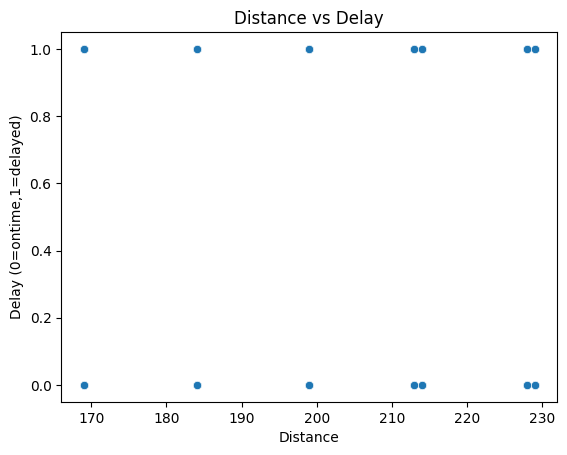

In [23]:
sns.scatterplot(x='Distance', y='Delayed_numeric', data=df)
plt.title("Distance vs Delay")
plt.xlabel("Distance")
plt.ylabel("Delay (0=ontime,1=delayed)")
plt.show()


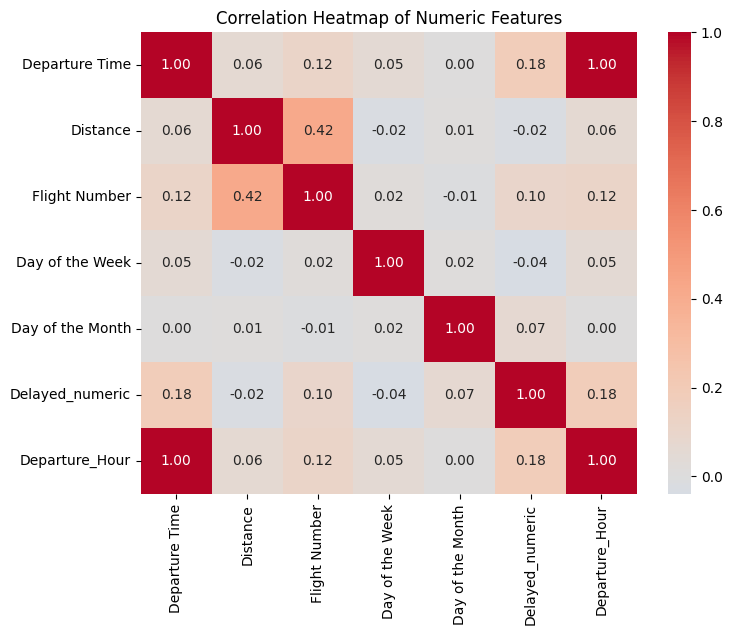

In [24]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [25]:
df.columns = df.columns.str.strip()

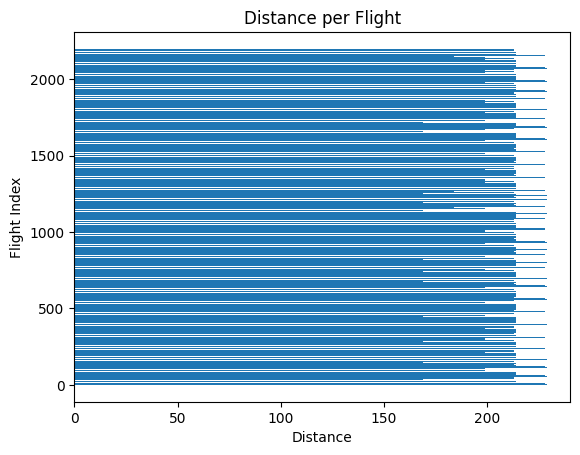

In [26]:
plt.barh(range(len(df)), df['Distance'])
plt.xlabel("Distance")
plt.ylabel("Flight Index")
plt.title("Distance per Flight")
plt.show()


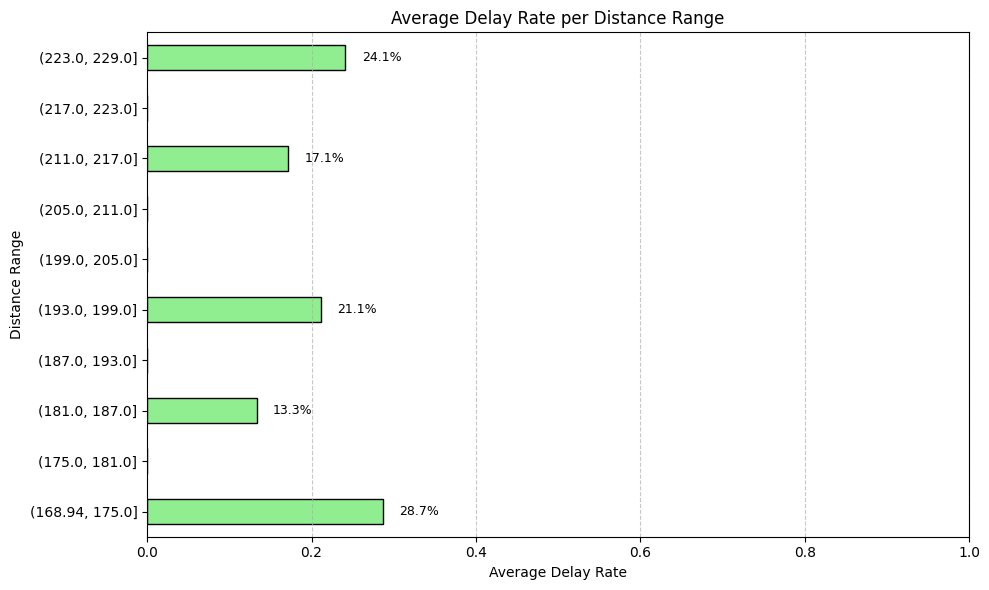

In [27]:
# 1️ Clean up column names (trailing spaces like 'Delayed ')
df.columns = df.columns.str.strip()

# 2️ Convert 'Delayed' column to numeric (if not already)
df['Delayed_numeric'] = df['Delayed'].map({'ontime': 0, 'delayed': 1})

# 3️ Create distance bins
df['Distance_bin'] = pd.cut(df['Distance'], bins=10)

# 4️ Group by bin and calculate mean delay rate
delay_rate = df.groupby('Distance_bin')['Delayed_numeric'].mean().sort_index()

# 5️ Plot horizontal bar chart
plt.figure(figsize=(10, 6))
delay_rate.plot(kind='barh', color='lightgreen', edgecolor='black')

plt.xlabel("Average Delay Rate")
plt.ylabel("Distance Range")
plt.title("Average Delay Rate per Distance Range")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate each bar with percentage
for i, value in enumerate(delay_rate):
    plt.text(value + 0.02, i, f"{value:.1%}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


## **BOXPLOT**

## **Boxplot for flight number**

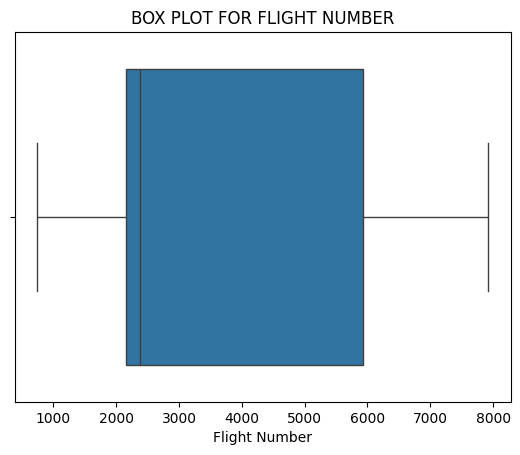

In [28]:
plt.title('BOX PLOT FOR FLIGHT NUMBER')
sns.boxplot(x='Flight Number', data=df)
plt.show()

## **Boxpot for distance and carrier**

**The above boxplot is for determining outliers for the flight number being travelled. No irrelavent flight numbers were found as it has no outliers**

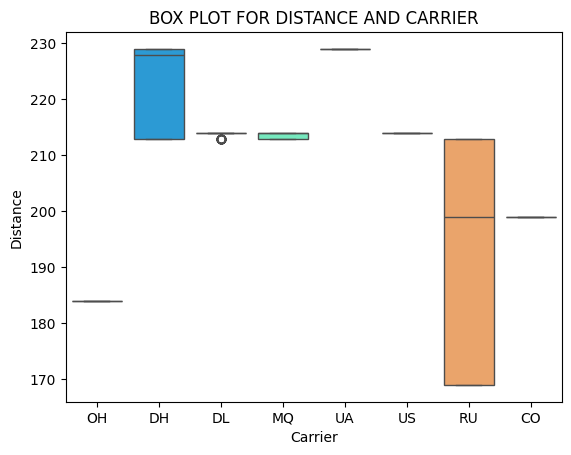

In [29]:
plt.title('BOX PLOT FOR DISTANCE AND CARRIER')
sns.boxplot(x='Carrier',y='Distance',data=df,palette='rainbow')
plt.show()

**Box plot for distance and carrier is been plotted to find the outliers**

### **Plotting On-Time and Delayed status of flight**

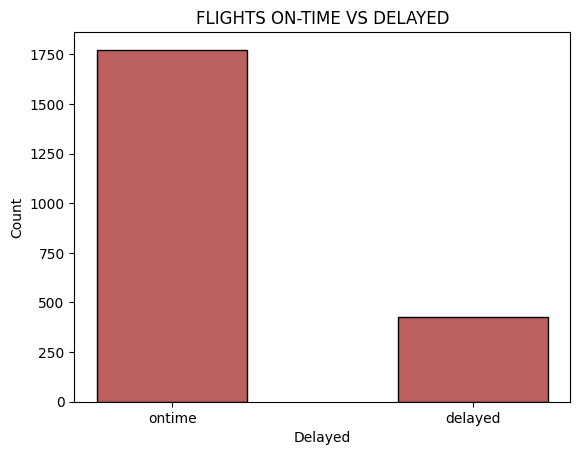

In [30]:
#count of flights which were ontime and delayed
t=df['Delayed'].value_counts()
plt.title('FLIGHTS ON-TIME VS DELAYED')
sns.histplot(x='Delayed',color='brown',shrink=0.5,data=df)
plt.show()

**This visualization shows the number of flights which were on-time and delayed.**

- Most of the flights are On-Time.
- Few flights were Delayed.

### **Plot for the status of flight based on Origin**

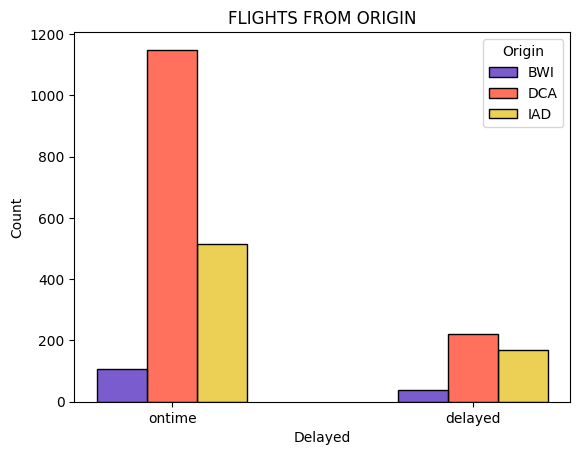

In [31]:
#determining flights from origin based on arrival
plt.title('FLIGHTS FROM ORIGIN')
sns.histplot(x='Delayed',hue='Origin',palette='CMRmap',binwidth=.8,shrink=.5,multiple='dodge',data=df)
plt.show()

**This plot shows the status of number of flights which were from various origin. We can see that many flights reached On Time and small proportion of flights were late.**

**On-Time stats**

- DCA has most number flights which were - - On-Time compared with others
- Flights from BWI were less on time

**Delayed stats**

- More number flights got delayed from DCA
- BWI has less number of delayed flights

## **Plot for the status of flight based on Carrier**

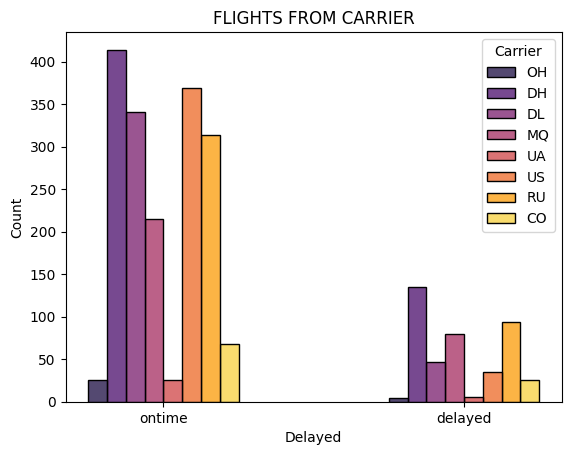

In [32]:
# determining flights from carrier based on arrival
plt.subplot()
plt.title('FLIGHTS FROM CARRIER')
sns.histplot(data=df,x='Delayed',hue='Carrier',palette='inferno',shrink=.5,multiple='dodge')
plt.show()

**This plot shows the status of number of flights which were from various carrier. We can see that many flights reached on time from Carrier and small proportion of flights were late.**

### **On-Time stats**

- DH has most number flights which were On-Time compared with others
- Flights from OH were less on time

### **Delayed stats**

- More number flights got delayed from DH
- OH has less number of delayed flights

## **Plot for the status of flight based on Destination**

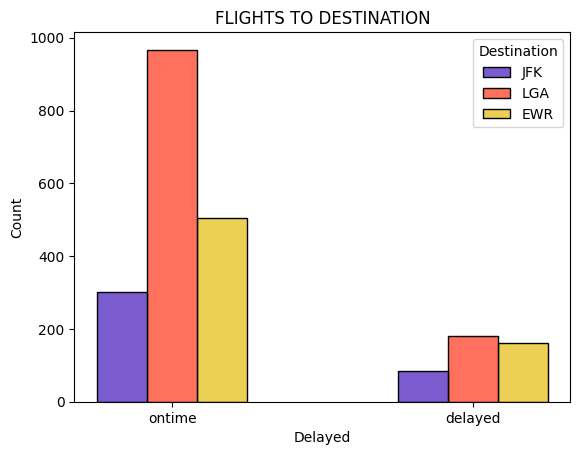

In [33]:
#determining flights from destination based on arrival
plt.title('FLIGHTS TO DESTINATION')
sns.histplot(x='Delayed',hue='Destination',palette='CMRmap',binwidth=.8,shrink=.5,multiple='dodge',data=df)
plt.show()

**This plot shows the status of number of flights which reached different destinations.**

### **On-Time stats**

- LGA has most number where flights reached - On-Time compared with others
- Flights from JFK were less on time

### **Delayed stats**

- More number flights got delayed to reach LGA
- JFK has less number of delayed flights

## **Relplot for arrival of flights based on destination**

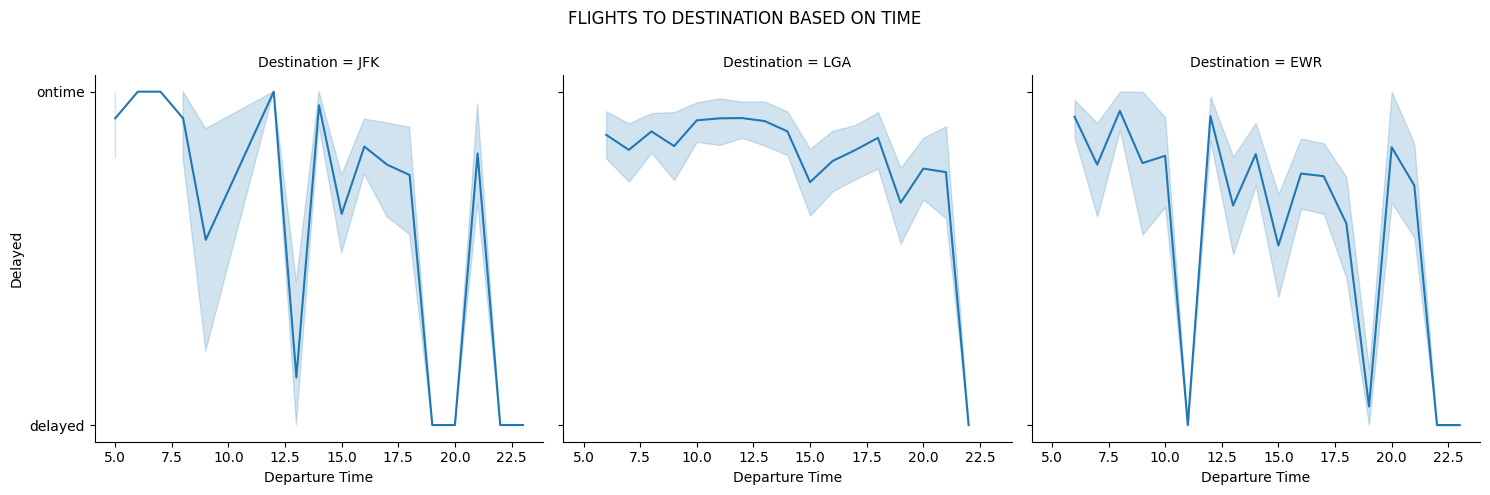

In [34]:
#showing the arrival of flight based on its destination
y=sns.relplot(data=df,x='Departure Time',y='Delayed',kind='line',col='Destination')
y.fig.suptitle("FLIGHTS TO DESTINATION BASED ON TIME")
plt.subplots_adjust(top=0.85)
plt.show()

**This relplot shows the relation between departure time of the flight and status of the flight.**

- Flights between 18 to 20 hours and above22.5 hours has reached the destination JFK1 getting `Delayed
- Most of Flights reaching LGA were On-Time
- Flights between 10 to 11 hours and at 22  hours has Delayed flight for destiantion EWR

**Showing the flight traffic based on days in a week**

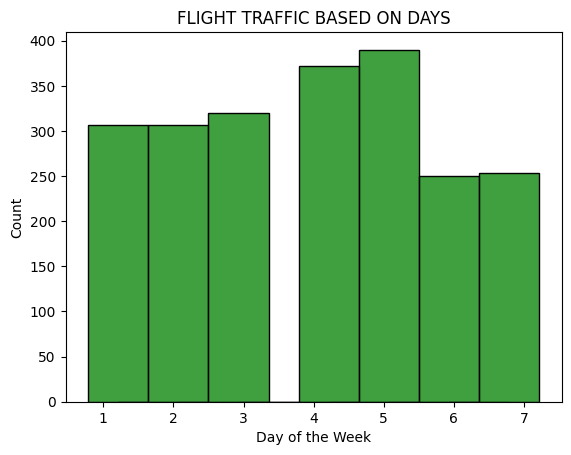

In [35]:
#flight traffic on days in a week
plt.title('FLIGHT TRAFFIC BASED ON DAYS')
sns.histplot(x='Day of the Week',data=df,shrink=2,color='Green')
plt.show()

**This chart shows the flight tarffic for each day in a week**

- Friday has more traffic than anyother days
- Saturday has less traffic than other days

**Showing the flight traffic based on monthly days**

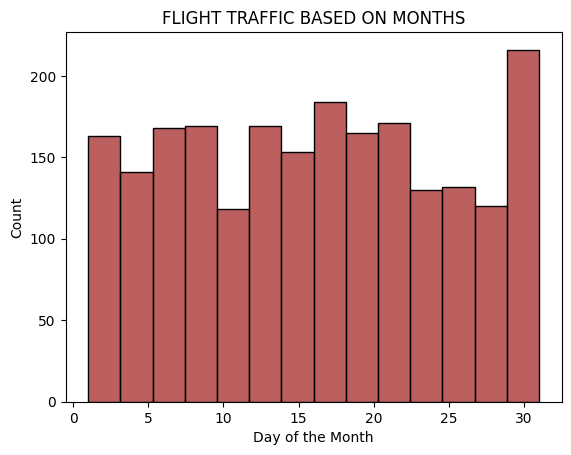

In [36]:
#flight traffic on days in a month
plt.title('FLIGHT TRAFFIC BASED ON MONTHS')
sns.histplot(x='Day of the Month',data=df,color='Brown')
plt.show()

**This chart shows the flight tarffic for each day in a month**

- Day 30 has more traffic than anyother days
- Day 10 to 12 has less traffic than other days

## **Occurence of carrier variable**

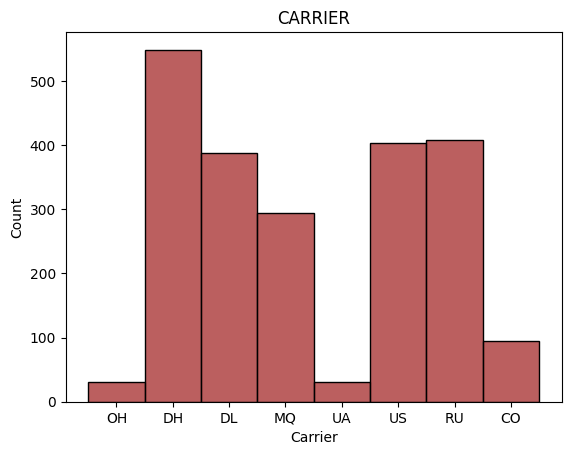

In [37]:
#occurence of carrier variable
plt.title('CARRIER')
sns.histplot(data=df,x='Carrier',color='Brown')
plt.show()

**This plot shows the distribution of the carrier variables(occurence of the carrier variable)**

- DH has repeated more time
- OH and UA are less repeated

## **Plotting the proportion of destination and origin part of the flight**

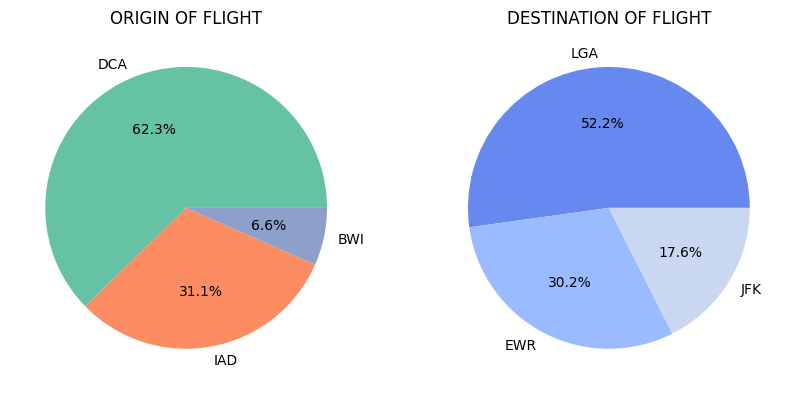

In [38]:
#determing the most occurred destination and origin
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
origin_counts=df['Origin'].value_counts()
plt.title('ORIGIN OF FLIGHT')
color=sns.color_palette('Set2')
plt.pie(x=origin_counts.values,labels=origin_counts.index,autopct='%1.1f%%',colors=color)

plt.subplot(1,2,2)
destination_counts=df['Destination'].value_counts()
plt.title('DESTINATION OF FLIGHT')
color=sns.color_palette('coolwarm')
plt.pie(x=destination_counts.values,labels=destination_counts.index,autopct='%1.1f%%',colors=color)

plt.show()

**This pie-chart shows the individual count of flight for destination and origin along with their percentile.**

### **ORIGIN**

- DCA has most of the flight origin than other two
- BWI has less number of origin of flight than other two.

### **DESTINATION**

- LGA has more arrival than other two
- JFK has less number of arrial than other two

## **Flight reach on days in a week**

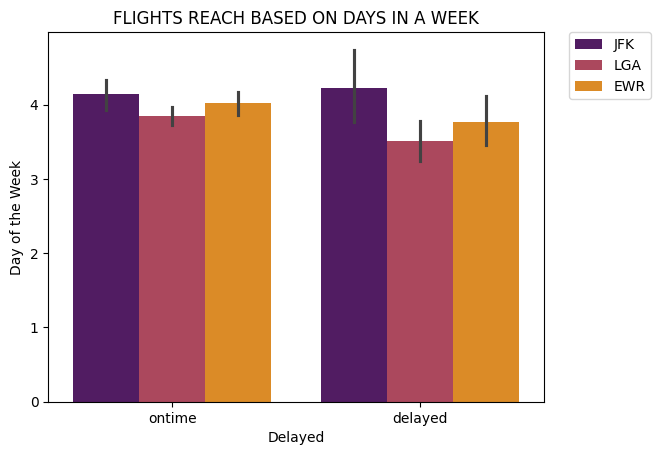

In [39]:
#Determining the status of flight traffic in a week
plt.title('FLIGHTS REACH BASED ON DAYS IN A WEEK')
sns.barplot(x='Delayed',y='Day of the Week',hue='Destination',palette='inferno',data=df)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0.)
plt.show()

This plot shows the status of number of flights which reached the destinations on different days in a week.

### **On-Time stats**

- JFK has reached mostly on 5th day
- LGA has reached nearly to the4th day
- EWR has reached mostly on 4th day

### **Delayed stats**

- JFK has reached mostly on 5th day
- LGA has reached mostly in between 3rd and 4th day
- EWR has reached mostly in between 3rd and 4th day

## **Flight reaching on days in a week**

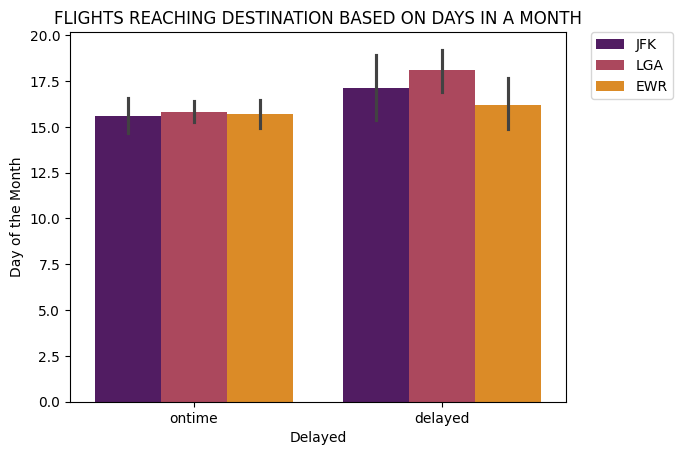

In [40]:
#Determining the status of flight traffic in a month
plt.title('FLIGHTS REACHING DESTINATION BASED ON DAYS IN A MONTH')
sns.barplot(x='Delayed',y='Day of the Month',hue='Destination',palette='inferno',data=df)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0.)
plt.show()

**This plot shows the status of number of flights which reached the destinations on different days in a month.**

## **On-Time stats**

- JFK,LGA,EWR has reached mostly on 16th day in a month

### **Delayed stats**

- JFK has reached mostly on 17th day
- LGA has reached mostly on 18th day
- EWR has reached mostly on 16th day

## **Plotting for distance and origin of flight**

<Axes: xlabel='Distance', ylabel='Origin'>

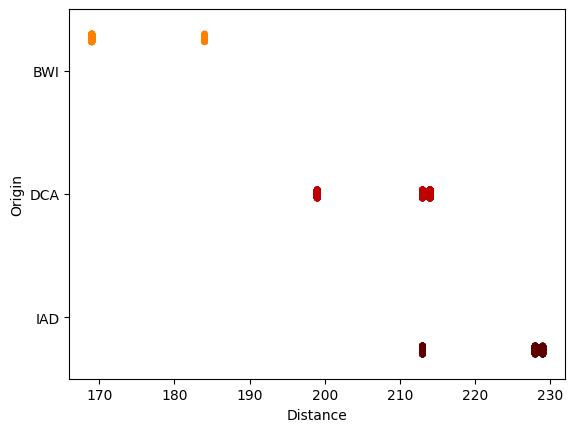

In [41]:
#stripplot for distance and origin of the flight
sns.stripplot(x='Distance',y='Origin',data=df,dodge=True,palette='gist_heat_r')

**This strip plot marks the relation between distance and origin**

- DCA has more origin at a distance of 210 to 220
- IAD has more origin at a distance of 220 to 230

### **Jointplots for plotting flight number and status of the fight**

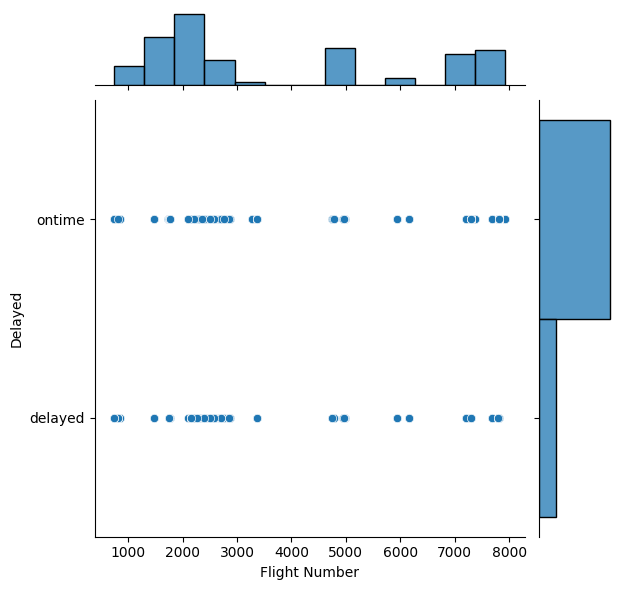

In [42]:
#joint plot for flight number and delayed parameter
sns.jointplot(x='Flight Number',y='Delayed',data=df)

**This jointplot shows the relation between flight number and delay time as a scatter and histplot.**

- Maximum he flights were On-time
- Flight number ranging between 2000 and 3000 were more On-time.

## **MODEL TRAINING**

**Various Machine Learning algorithms are used to train a model to give a prediction based on the available datas. Many functions and libraries are used for precise prediction of data. Various algorithms are used for predicting the desired parameters. One such method used in this system is the Naive Bayes Probabilty theorem for predicting values**

### **Naive bayes can be classified into three types namely**
    
    GAUSSIAN     : for continous data
    MULTINOMIAL  : for discrete data
    BERNOULLI    : for binary data
    

### **Gaussian model is used here for the prediction**

**To predict accurately, only essential features are required and others can be dropped Here the essential features are**

- Carrier
- Departure time
- Destination
- Origin
- Day of the week

**Having 5 number of features, a target variable is fixed which is Delayed in our case**

**A temporary variable is created for storing only the essential features required to train the model.**

In [43]:
#dropping of unwanted features and assigning necessary features
temp=['Day of the Month','Flight Number','Date','Distance']
inputs=df.drop(temp,axis=1)

In [44]:
inputs

,Carrier,Departure Time,Destination,Origin,Day of the Week,Delayed,Delayed_numeric,Departure_Hour,Distance_Bin,Distance_bin
0,OH,14,JFK,BWI,4,ontime,0,14,"(100, 200]","(181.0, 187.0]"
1,DH,16,JFK,DCA,4,ontime,0,16,"(200, 300]","(211.0, 217.0]"
2,DH,12,LGA,IAD,4,ontime,0,12,"(200, 300]","(223.0, 229.0]"
3,DH,17,LGA,IAD,4,ontime,0,17,"(200, 300]","(223.0, 229.0]"
4,DH,10,LGA,IAD,4,ontime,0,10,"(200, 300]","(223.0, 229.0]"
...,...,...,...,...,...,...,...,...,...,...
2194,RU,6,EWR,DCA,6,ontime,0,6,"(100, 200]","(193.0, 199.0]"
2195,RU,16,EWR,IAD,6,ontime,0,16,"(200, 300]","(211.0, 217.0]"
2196,RU,15,EWR,DCA,6,ontime,0,15,"(100, 200]","(193.0, 199.0]"
2197,RU,14,EWR,DCA,6,ontime,0,14,"(100, 200]","(193.0, 199.0]"


**This new data has 5 features and also the target variable delayed**

**Certain libraries are imported for predicitng the features and to produce the output. With these libraries, models are trained based on probablity theorem such as Naive Bayes which is been used in our prediction.**

In [45]:
#importing libraries for training the model
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Also models could predict only the numerical datas (only numbers).**

**Features which having categorical datas are converted into numerical data using various methods are known as encoding.**

**There are several encoding methods been used such as**

- OneHotLabel
- LabelEncoder
- BinaryEncoding

**Label encoding type is used in here to convert categorical data into numerical data**

- This method assigns unique numerical value to each category having similar values. Target feature has also been converted into numerical data as the prediction is based on the target feature - Delayed -0 - Ontime -1

In [46]:
le=LabelEncoder()

In [47]:
dfle=inputs
dfle.Carrier=le.fit_transform(dfle.Carrier)
dfle.Destination=le.fit_transform(dfle.Destination)
dfle.Origin=le.fit_transform(dfle.Origin)
dfle.Delayed=le.fit_transform(dfle.Delayed)
dfle

,Carrier,Departure Time,Destination,Origin,Day of the Week,Delayed,Delayed_numeric,Departure_Hour,Distance_Bin,Distance_bin
0,4,14,1,0,4,1,0,14,"(100, 200]","(181.0, 187.0]"
1,1,16,1,1,4,1,0,16,"(200, 300]","(211.0, 217.0]"
2,1,12,2,2,4,1,0,12,"(200, 300]","(223.0, 229.0]"
3,1,17,2,2,4,1,0,17,"(200, 300]","(223.0, 229.0]"
4,1,10,2,2,4,1,0,10,"(200, 300]","(223.0, 229.0]"
...,...,...,...,...,...,...,...,...,...,...
2194,5,6,0,1,6,1,0,6,"(100, 200]","(193.0, 199.0]"
2195,5,16,0,2,6,1,0,16,"(200, 300]","(211.0, 217.0]"
2196,5,15,0,1,6,1,0,15,"(100, 200]","(193.0, 199.0]"
2197,5,14,0,1,6,1,0,14,"(100, 200]","(193.0, 199.0]"


### **Target feature has been assigned**

In [48]:
# Delayed is set as target variable
target=dfle.Delayed
target

,Delayed
0,1
1,1
2,1
3,1
4,1
...,...
2194,1
2195,1
2196,1
2197,1


#### **It is essential to seperate the target variable from the other feature so that the datasplit occurs without any errors. Target feature gets dropped from other columns and stored in a different variable**

In [49]:
#seperation of target feature
gets=dfle.drop('Delayed',axis='columns')
gets

,Carrier,Departure Time,Destination,Origin,Day of the Week,Delayed_numeric,Departure_Hour,Distance_Bin,Distance_bin
0,4,14,1,0,4,0,14,"(100, 200]","(181.0, 187.0]"
1,1,16,1,1,4,0,16,"(200, 300]","(211.0, 217.0]"
2,1,12,2,2,4,0,12,"(200, 300]","(223.0, 229.0]"
3,1,17,2,2,4,0,17,"(200, 300]","(223.0, 229.0]"
4,1,10,2,2,4,0,10,"(200, 300]","(223.0, 229.0]"
...,...,...,...,...,...,...,...,...,...
2194,5,6,0,1,6,0,6,"(100, 200]","(193.0, 199.0]"
2195,5,16,0,2,6,0,16,"(200, 300]","(211.0, 217.0]"
2196,5,15,0,1,6,0,15,"(100, 200]","(193.0, 199.0]"
2197,5,14,0,1,6,0,14,"(100, 200]","(193.0, 199.0]"


### **TEST-TRAIN SPLIT**

**Model will be trained based on the train and test splitting of data. Generally 80% of data will be used for training the model and 20% of data as testing model. Based on the training model, the model will be trained to predict the results of the testing data.**

**Our model contains 2199 number of datas where 2100 are split into training model and other 99 as testing model**

In [50]:
#spliting of dataset with correct proportion
x_train,x_test,y_train,y_test=train_test_split(gets,target,test_size=99,random_state=5)

In [51]:
#displaying x train set variable
x_train

,Carrier,Departure Time,Destination,Origin,Day of the Week,Delayed_numeric,Departure_Hour,Distance_Bin,Distance_bin
1648,7,12,2,1,5,1,12,"(200, 300]","(211.0, 217.0]"
54,1,17,2,2,5,0,17,"(200, 300]","(223.0, 229.0]"
1830,3,20,2,1,1,1,20,"(200, 300]","(211.0, 217.0]"
1073,5,6,0,2,4,1,6,"(200, 300]","(211.0, 217.0]"
1828,3,9,2,1,1,1,9,"(200, 300]","(211.0, 217.0]"
...,...,...,...,...,...,...,...,...,...
740,5,10,0,0,7,0,10,"(100, 200]","(168.94, 175.0]"
1032,2,16,2,1,4,0,16,"(200, 300]","(211.0, 217.0]"
2121,7,18,2,1,5,0,18,"(200, 300]","(211.0, 217.0]"
1424,5,18,0,2,2,0,18,"(200, 300]","(211.0, 217.0]"


### **Length of train and test is evaluated to check the correctness of data split**

In [52]:
len(x_train)

2100

In [53]:
len(x_test)

99

In [54]:
#displaying y train set variable
y_train

,Delayed
1648,0
54,1
1830,0
1073,0
1828,0
...,...
740,1
1032,1
2121,1
1424,1


In [55]:
#displaying y test set variable
y_test

,Delayed
653,1
417,1
2172,1
1351,1
723,1
...,...
1036,0
1282,1
1190,1
1383,1


In [56]:
len(y_train)

2100

In [57]:
len(y_test)

99

**Training and test datas are correctly splitted as mentioned**

**As our model consists of continous data, Gaussian method of Naive Bayes is used for prediction of flight status**

In [58]:
for col in x_train.columns:
    if x_train[col].apply(lambda x: isinstance(x, pd.Interval)).any():
        print("Interval column:", col)

Interval column: Distance_Bin
Interval column: Distance_bin


In [59]:
# Replace intervals with their left bound
for col in x_train.columns:
    if x_train[col].apply(lambda x: isinstance(x, pd.Interval)).any():
        x_train[col] = x_train[col].apply(lambda x: x.left)
        x_test[col] = x_test[col].apply(lambda x: x.left)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize
rf_model = RandomForestClassifier(random_state=42)

# Fit
rf_model.fit(x_train, y_train)

# Predict
rf_pred = rf_model.predict(x_test)
rf_proba = rf_model.predict_proba(x_test)[:,1]

# Metrics
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))


Random Forest Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


In [61]:
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (2100, 9) (2100,)
Test shape: (99, 9) (99,)


In [62]:
# Check intersection of indices (if you didn't reset indices)
intersection = set(x_train.index).intersection(set(x_test.index))
print("Overlapping rows:", len(intersection))


Overlapping rows: 0


In [63]:
# Combine X and y to inspect correlations
import pandas as pd

# If y_train is a Series, reset index to align
train_df = pd.concat([x_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

# Show correlation with target column
correlations = train_df.corr()

# Print correlations with the target
print(correlations.iloc[-1].sort_values(ascending=False))

Delayed            1.000000
Carrier            0.097196
Destination        0.092053
Distance_Bin       0.036215
Day of the Week    0.031271
Distance_bin       0.019996
Origin            -0.056757
Departure Time    -0.178902
Departure_Hour    -0.178902
Delayed_numeric   -1.000000
Name: Delayed, dtype: float64


In [64]:
# Drop the leaking column
x_train = x_train.drop(columns=['Delayed_numeric'])
x_test = x_test.drop(columns=['Delayed_numeric'])

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize
rf_model = RandomForestClassifier(random_state=42)

# Fit
rf_model.fit(x_train, y_train)

# Predict
rf_pred = rf_model.predict(x_test)
rf_proba = rf_model.predict_proba(x_test)[:,1]

# Metrics
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))


Random Forest Classifier Metrics:
Accuracy: 0.8181818181818182
Precision: 0.8795180722891566
Recall: 0.9012345679012346
F1 Score: 0.8902439024390244
ROC AUC: 0.6903292181069959


In [66]:
from sklearn.linear_model import LogisticRegression

# Initialize
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit
logreg_model.fit(x_train, y_train)

# Predict
logreg_pred = logreg_model.predict(x_test)
logreg_proba = logreg_model.predict_proba(x_test)[:,1]

# Metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("Precision:", precision_score(y_test, logreg_pred))
print("Recall:", recall_score(y_test, logreg_pred))
print("F1 Score:", f1_score(y_test, logreg_pred))
print("ROC AUC:", roc_auc_score(y_test, logreg_proba))


Logistic Regression Metrics:
Accuracy: 0.8181818181818182
Precision: 0.8181818181818182
Recall: 1.0
F1 Score: 0.9
ROC AUC: 0.73079561042524


In [67]:
x_train = x_train.drop(columns=['Delayed', 'Delayed_numeric'], errors='ignore')
x_test = x_test.drop(columns=['Delayed', 'Delayed_numeric'], errors='ignore')

In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical columns
for col in x_train.select_dtypes(include=['object', 'category']).columns:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])


In [69]:
from xgboost import XGBClassifier

# Initialize
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit
xgb_model.fit(x_train, y_train)

# Predict
xgb_pred = xgb_model.predict(x_test)
xgb_proba = xgb_model.predict_proba(x_test)[:,1]

# Metrics
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))


XGBoost Classifier Metrics:
Accuracy: 0.8080808080808081
Precision: 0.8690476190476191
Recall: 0.9012345679012346
F1 Score: 0.8848484848484849
ROC AUC: 0.7328532235939644


In [70]:
from sklearn.svm import SVC

# Initialize
svc_model = SVC(probability=True, random_state=42)

# Fit
svc_model.fit(x_train, y_train)

# Predict
svc_pred = svc_model.predict(x_test)
svc_proba = svc_model.predict_proba(x_test)[:,1]

# Metrics
print("Support Vector Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, svc_pred))
print("Precision:", precision_score(y_test, svc_pred))
print("Recall:", recall_score(y_test, svc_pred))
print("F1 Score:", f1_score(y_test, svc_pred))
print("ROC AUC:", roc_auc_score(y_test, svc_proba))

Support Vector Classifier Metrics:
Accuracy: 0.8181818181818182
Precision: 0.8181818181818182
Recall: 1.0
F1 Score: 0.9
ROC AUC: 0.6457475994513031


In [71]:
from sklearn.linear_model import LogisticRegression

# Initialize
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit
logreg_model.fit(x_train, y_train)

# Predict
logreg_pred = logreg_model.predict(x_test)
logreg_proba = logreg_model.predict_proba(x_test)[:,1]

# Metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("Precision:", precision_score(y_test, logreg_pred))
print("Recall:", recall_score(y_test, logreg_pred))
print("F1 Score:", f1_score(y_test, logreg_pred))
print("ROC AUC:", roc_auc_score(y_test, logreg_proba))


Logistic Regression Metrics:
Accuracy: 0.8181818181818182
Precision: 0.8181818181818182
Recall: 1.0
F1 Score: 0.9
ROC AUC: 0.7301097393689986


In [72]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf,
                       scoring='f1',
                       cv=3)

grid_rf.fit(x_train, y_train)

print("Random Forest Best Params:", grid_rf.best_params_)
print("Best F1 Score:", grid_rf.best_score_)


Random Forest Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.9051306075341005


In [73]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid_xgb,
                        scoring='f1',
                        cv=3)

grid_xgb.fit(x_train, y_train)

print("XGBoost Best Params:", grid_xgb.best_params_)
print("Best F1 Score:", grid_xgb.best_score_)


XGBoost Best Params: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
Best F1 Score: 0.9066276003446595


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Grid Search
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1',
    cv=10,
    verbose=1,
    n_jobs=-1
)

grid_rf.fit(x_train, y_train)

# Results
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best F1 Score on CV:", grid_rf.best_score_)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score on CV: 0.9082004731214589


In [75]:
from xgboost import XGBClassifier

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Grid Search
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=10,
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(x_train, y_train)

# Results
print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best F1 Score on CV:", grid_xgb.best_score_)


Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best XGBoost Parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
Best F1 Score on CV: 0.9135105087342168


In [76]:
grid_rf.best_params_

grid_rf.best_score_

grid_xgb.best_params_

grid_xgb.best_score_

0.9135105087342168

In [77]:
pip install pycaret

In [78]:
import pandas as pd
from pycaret.classification import *

In [79]:
df = pd.read_csv('/content/Flight-Data.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Carrier           2199 non-null   object
 1   Departure Time    2199 non-null   int64 
 2   Destination       2199 non-null   object
 3   Distance          2199 non-null   int64 
 4   Date              2199 non-null   object
 5   Flight Number     2199 non-null   int64 
 6   Origin            2199 non-null   object
 7   Day of the Week   2199 non-null   int64 
 8   Day of the Month  2199 non-null   int64 
 9   Delayed           2199 non-null   object
dtypes: int64(5), object(5)
memory usage: 171.9+ KB


In [81]:
df.columns

Index(['Carrier', 'Departure Time', 'Destination', 'Distance', 'Date',
       'Flight Number', 'Origin', 'Day of the Week', 'Day of the Month',
       'Delayed '],
      dtype='object')

<Axes: >

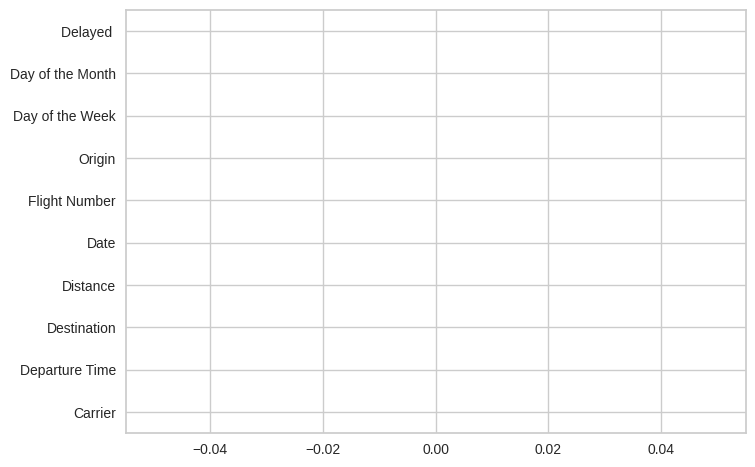

In [82]:
df.isnull().sum().plot(kind = 'barh')

<Axes: ylabel='count'>

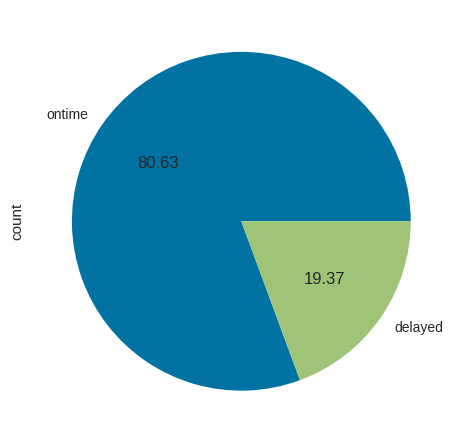

In [83]:
df['Delayed '].value_counts().plot(kind = 'pie',autopct = '%1.2f')

In [90]:
# Use 'Delayed' as the target column (y)
X = df.drop('Delayed ', axis=1)
y = df['Delayed ']

In [91]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X_train.select_dtypes(include=['object', 'category']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [97]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [98]:
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
Delayed 
ontime     1241
delayed     298
Name: count, dtype: int64

After SMOTE:
Delayed 
ontime     1241
delayed    1241
Name: count, dtype: int64


In [101]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [102]:
accuracy_score(y_test,y_pred)

0.8606060606060606

In [103]:
# USing Randomized search cv

from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300,500],
    'max_depth': [None, 10, 20, 30, 40,1000],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [104]:
rscv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=11,
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rscv.fit(X_train, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=11,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40,
                                                      1000],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   random_state=42, verbose=2)

In [105]:
# Best model
best_model = rscv.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
print("Best Parameters:", rscv.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 1000, 'bootstrap': False}
Test Accuracy: 0.8621212121212121


In [106]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

scores = []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)
scores

[0.8831168831168831,
 0.8701298701298701,
 0.8181818181818182,
 0.8896103896103896,
 0.8051948051948052,
 0.8116883116883117,
 0.8376623376623377,
 0.8311688311688312,
 0.8766233766233766,
 0.8562091503267973]

In [107]:
sum(scores) / len(scores)

0.8479585773703422

In [108]:
!pip install gradio

In [109]:
import pandas as pd

# For LabelEncoder (same encoder you used during training)
le = LabelEncoder()

# Re-fit encoders to be able to transform user inputs
for col in X.select_dtypes(include=['object', 'category']).columns:
    le.fit(X[col])

# List of feature names
feature_names = list(X.columns)

def predict_delay(*inputs):
    # Create a DataFrame with one row
    input_df = pd.DataFrame([inputs], columns=feature_names)

    # Encode categorical columns
    for col in input_df.select_dtypes(include=['object', 'category']).columns:
        input_df[col] = le.transform(input_df[col])

    # Predict
    pred = rf_model.predict(input_df)[0]
    return "Delayed" if pred == 1 else "On Time"


In [111]:
import gradio as gr

inputs = [
    gr.Textbox(label="Carrier"),
    gr.Number(label="Departure Time"),
    gr.Number(label="Distance")
]

In [114]:
gr.Interface(
    fn=predict_delay,
    inputs=inputs,
    outputs=gr.Textbox(label="Prediction"),
    title="Flight Delay Predictor",
    description="Enter flight details to predict delay status."
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1a6710d22aac393593.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [115]:
import pandas as pd
import gradio as gr

# Example LabelEncoder for Carrier (make sure you re-fit this on your data)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(X['Carrier'])

# Example model (use your trained model)
# rf_model = your trained model (RandomForest, etc.)

def predict_delay(Carrier, Departure_Time, Distance):
    try:
        # Build DataFrame
        input_df = pd.DataFrame(
            [[Carrier, Departure_Time, Distance]],
            columns=['Carrier', 'Departure Time', 'Distance']
        )

        # Debug print (see what data arrives)
        print("Input DataFrame:\n", input_df)

        # Validate Carrier
        if Carrier not in le.classes_:
            return f"Error: Carrier '{Carrier}' not recognized. Must be one of {list(le.classes_)}."

        # Encode Carrier
        input_df['Carrier'] = le.transform(input_df['Carrier'])

        # Predict
        pred = rf_model.predict(input_df)[0]
        return "Delayed" if pred == 1 else "On Time"

    except Exception as e:
        print("Error occurred:", e)
        return f"Error: {str(e)}"

# Gradio app
interface = gr.Interface(
    fn=predict_delay,
    inputs=[
        gr.Textbox(label="Carrier"),
        gr.Number(label="Departure Time"),
        gr.Number(label="Distance")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Flight Delay Predictor",
    description="Enter flight details to predict delay status."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ce3785b7b72a21ec2f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
